In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 

## Valence and Arousal Means for Certain English Words

In [12]:
def get_valence_arousal():
    
    df = pd.read_csv('Ratings_Warriner_et_al.csv', index_col=0)
    df = df[['Word','V.Mean.Sum', 'A.Mean.Sum']]
  
    df.columns=['word', 'valence', 'arousal']
    df.set_index('word',inplace=True)
    words = df.to_dict('index')

    return df, words

valence_arousal_df, words = get_valence_arousal()

In [7]:
pip install wordcloud

     |████████████████████████████████| 220 kB 578 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=159852 sha256=9a172049fa8146e6806cd65153cab5fa18dac1ceae8e62ae5940542dbff86bd5
  Stored in directory: /Users/milakobayashi/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


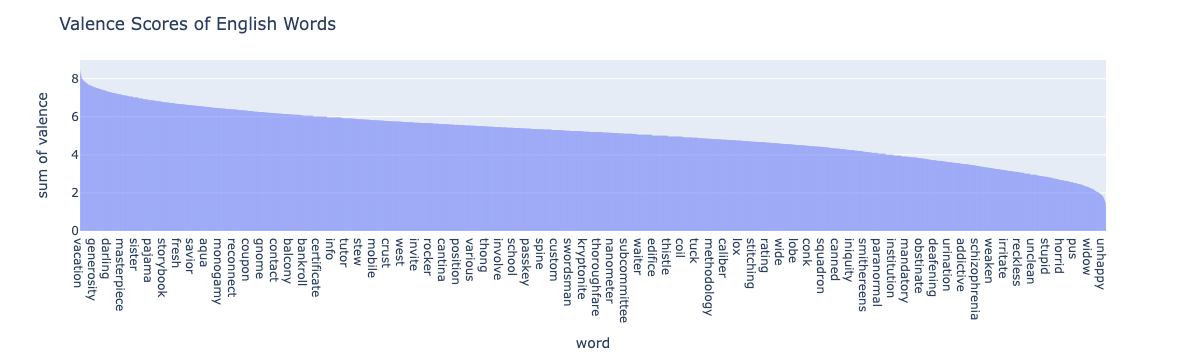

In [51]:
import plotly.express as px

valence_df = valence_arousal_df.sort_values(by=['valence'], ascending = False)
fig = px.histogram(valence_df, x=valence_df.index, y = 'valence')
fig.update_layout(
    title={
        'text': 'Valence Scores of English Words',
    })
fig.show()

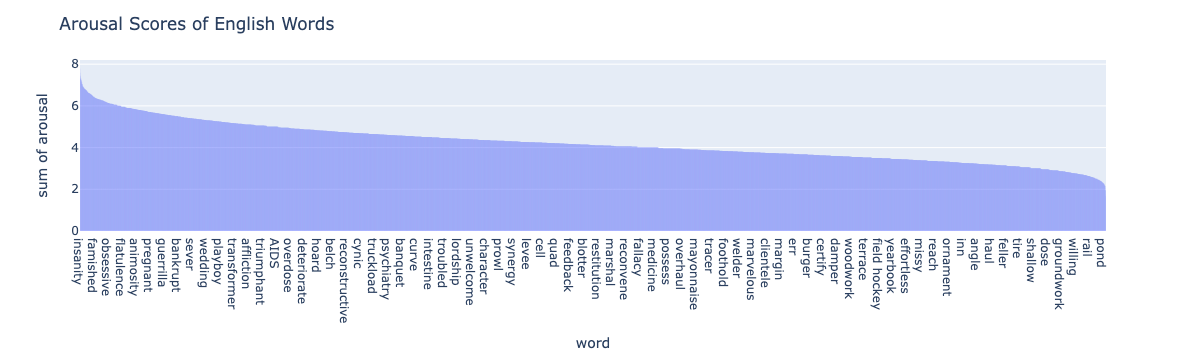

In [50]:
valence_df = valence_arousal_df.sort_values(by=['arousal'], ascending = False)
fig = px.histogram(valence_df, x=valence_df.index, y = 'arousal')
fig.update_layout(
    title={
        'text': 'Arousal Scores of English Words',
    })
fig.show()

## Valence and Arousal for Playlist Songs 

In [43]:
lyrics_df = pd.read_csv('playlist.csv')

def get_valence_arousal(row):
    
    lyric = row['lyrics_filtered']
    
    if lyric == 'Error: No lyrics found':
        row['valence_lyrics'] = None
        row['arousal_lyrics'] = None  
        return row
    
    lyric = lyric.split(' ')
    
    # remove duplicate words
    lyric = list(dict.fromkeys(lyric))
    word_count = len(lyric)
    
    valence_sum = 0
    arousal_sum = 0
    
    for word in lyric:
        if word in words:
            valence_sum += words[word]['valence']
            arousal_sum += words[word]['arousal']

    valence = valence_sum / word_count
    arousal = arousal_sum / word_count
    
    row['valence_lyrics'] = valence
    row['arousal_lyrics'] = arousal
    
    return row

lyrics_df = lyrics_df.apply(get_valence_arousal, axis=1)
lyrics_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,song_name,artist,album,id,artist_uri,genres,lyrics,lyrics_filtered,valence_lyrics,arousal_lyrics
0,0.722,0.845,2,-4.446,0,0.0308,0.287000,0.000000,0.0561,0.965,...,Stop,Spice Girls,Spiceworld,3FteycP8CaXS1MhjcXekVT,spotify:artist:0uq5PttqEjj3IH1bzwcrXF,"['dance pop', 'europop', 'girl group', 'pop']","[""[Verse 1: Ginger, Sporty, Baby &amp; Posh]\n...",walk make smile cool even know take inch run m...,3.672667,2.521333
1,0.691,0.725,7,-3.501,1,0.0272,0.297000,0.000000,0.2680,0.464,...,Eloise,Arvingarna,Eloise,5Ws6u3a6SibPmJazXdEAHB,spotify:artist:1qC3LsWlbrRCPVRooOX81u,"['classic swedish pop', 'dansband', 'danspunk'...",['[Vers 1]\nSamla dina tankar i ensamhet innan...,samla dina tankar ensamhet innan jag går ut tr...,0.459444,0.364333
2,0.315,0.715,11,-8.072,0,0.0362,0.001250,0.000008,0.0942,0.497,...,Iris,The Goo Goo Dolls,Dizzy up the Girl,6Qyc6fS4DsZjB2mRW9DsQs,spotify:artist:2sil8z5kiy4r76CRTXxBCA,"['alternative rock', 'neo mellow', 'permanent ...","[""[Verse 1]\nAnd I'd give up forever to touch ...",i'd give forever touch 'cause know feel someho...,3.036939,2.178367
3,0.515,0.430,7,-9.935,1,0.0372,0.009700,0.000133,0.1290,0.104,...,Creep,Radiohead,Pablo Honey,70LcF31zb1H0PyJoS1Sx1r,spotify:artist:4Z8W4fKeB5YxbusRsdQVPb,"['alternative rock', 'art rock', 'melancholia'...","[""[Verse 1]\nWhen you were here before\nCouldn...",look eye like angel skin makes cry float like ...,4.597222,3.253611
4,0.647,0.514,8,-10.050,1,0.0593,0.065500,0.000000,0.3980,0.386,...,Gangsta's Paradise,Coolio,Gangsta's Paradise,1DIXPcTDzTj8ZMHt3PDt8p,spotify:artist:3y24n3XhZ96wgwRXjvS17T,"['g funk', 'gangster rap', 'hip hop', 'rap', '...","[""[Recording Info]\n\n[Verse 1: Coolio]\nAs I ...",[recording info] walk valley shadow death take...,2.640301,2.014436
5,0.564,0.839,2,-7.165,0,0.0323,0.199000,0.000005,0.0619,0.950,...,Sommaren i City,Angel,Äventyr i natten,4XoOCFKvikhwp0UcpBwJsO,spotify:artist:7FjElQ2FxgAbDGSrcE7K6O,[],['[Vers 1]\nJag minns det som igår\nFast det r...,jag minns det som igår fast det redan gått ett...,0.356264,0.248242
6,0.535,0.344,2,-18.016,1,0.0496,0.182000,0.000888,0.0818,0.514,...,Vem tänder stjärnorna,Eva Dahlgren,En blekt blondins hjärta,0xljZqZHvXhVfse33fQ9bK,spotify:artist:7IK2JpZglDYTrso4ILEKE0,"['classic swedish pop', 'swedish jazz', 'swedi...","[""Det var evighetssekunder\nTre korta andetag\...",det var evighetssekunder tre korta andetag hel...,0.266731,0.181058
7,0.674,0.789,8,-6.903,1,0.0676,0.001780,0.007100,0.0754,0.918,...,Song 2 - 2012 Remaster,Blur,Blur (Special Edition),1FTSo4v6BOZH9QxKc3MbVM,spotify:artist:7MhMgCo0Bl0Kukl93PZbYS,"['alternative rock', 'britpop', 'madchester', ...","[""[Intro]\nWoo-hoo\nWoo-hoo\nWoo-hoo\nWoo-hoo\...",woo-hoo woo-hoo woo-hoo woo-hoo got head check...,3.031786,2.185000
8,0.704,0.707,1,-6.537,0,0.0391,0.539000,0.001060,0.3180,0.761,...,The Boy Is Mine,Brandy,Never Say Never,6sHsXIJoEN5JpdkGMQDJxt,spotify:artist:05oH07COxkXKIMt6mIPRee,"['contemporary r&b', 'dance pop', 'hip hop', '...","[""[Intro]\nThe boy is mine\nThe boy is mine\nT...",boy mine boy mine boy mine boy mine boy mine [...,2.904687,2.093047
9,0.502,0.890,4,-5.175,1,0.0364,0.000147,0.011700,0.2170,0.259,...,Thunderstruck,AC/DC,The Razors Edge,57bgtoPSgt236HzfBOd8kj,spotify:artist:711MCceyCBcFnzjGY4Q7Un,"['australian rock', 'hard rock', 'rock']","[""[Intro]\nThunder, ah\nThunder, ah\nThunder, ...",thunder ah thunder ah thunder ah thunder ah th...,1.950000,1.340152


## Lyrics and audio features

In [45]:
import matplotlib.pyplot as plt
from scipy import stats

lyrics_df = lyrics_df.dropna()
x_vars = list(lyrics_df.select_dtypes('number'))

### Valence against Audio Features

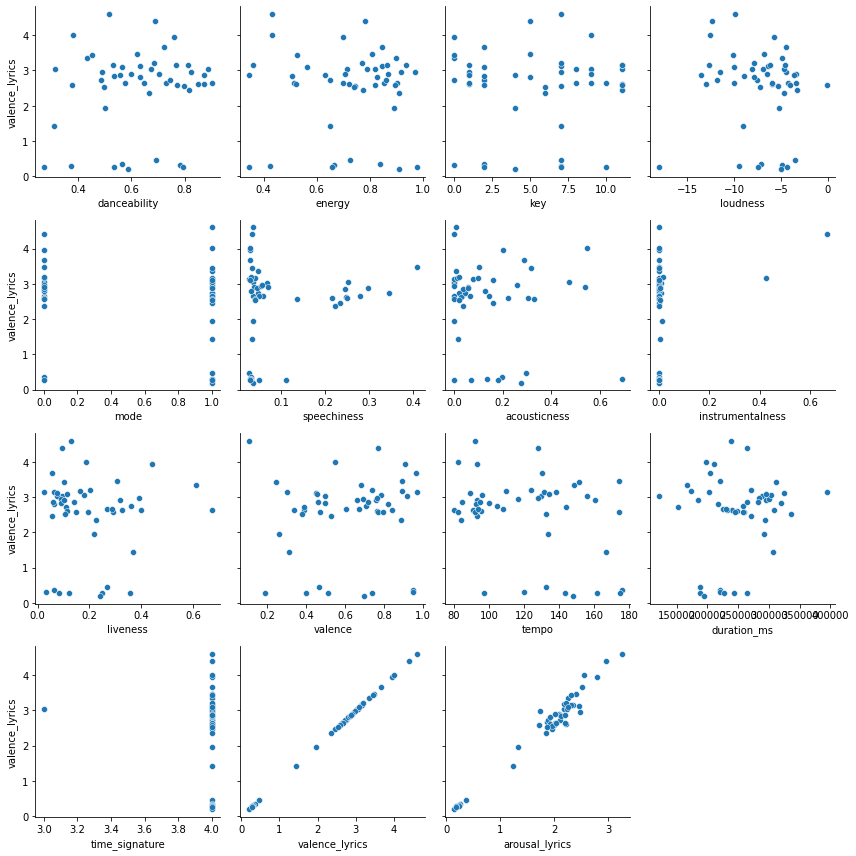

In [46]:
import seaborn as sns

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, xvar in zip(g.axes, x_vars):
    sns.scatterplot(data=lyrics_df, x=xvar, y="valence_lyrics", ax=ax)
g.tight_layout()

### Arousal against Audio Features

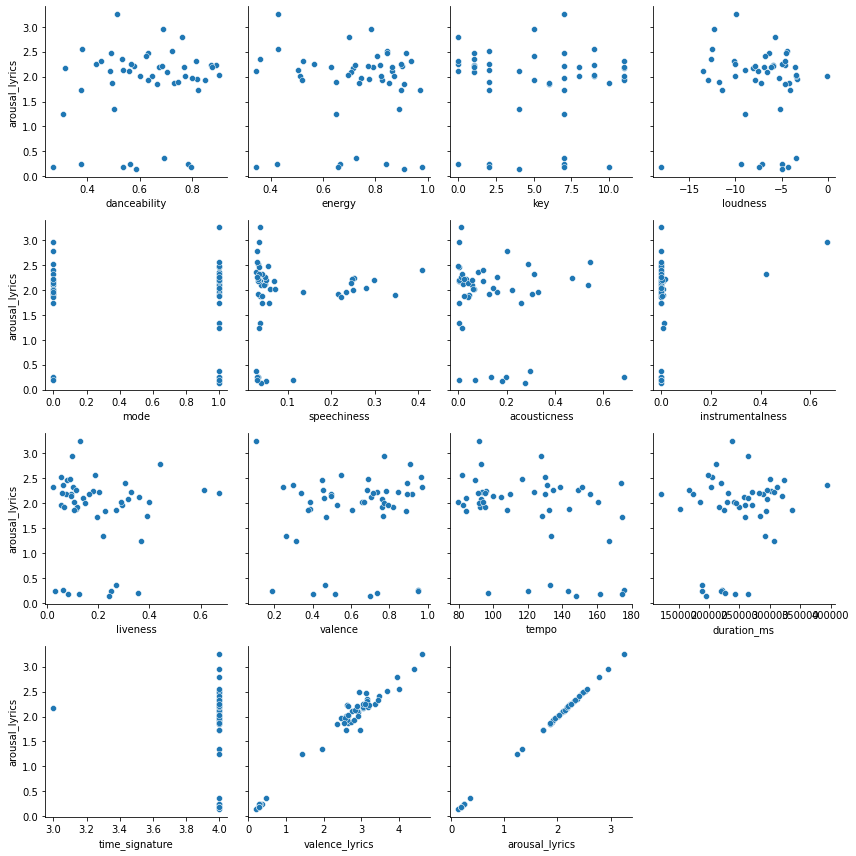

In [49]:
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, xvar in zip(g.axes, x_vars):
    sns.scatterplot(data=lyrics_df, x=xvar, y="arousal_lyrics", ax=ax)
g.tight_layout()

### P-values between valence/arousal and audio features

In [16]:
def spearmanr_pval(x,y):
        return stats.spearmanr(x,y)[1]

spearman_pvalue = lyrics_df.corr(method=spearmanr_pval)
spearman_pvalue = spearman_pvalue.loc[['valence_lyrics', 'arousal_lyrics']]
spearman_pvalue.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,valence_lyrics,arousal_lyrics
valence_lyrics,0.946184,0.363034,0.889289,0.833430,0.509658,0.264783,0.677575,0.207075,0.847201,0.260573,0.747965,0.969919,0.409064,1.000000e+00,6.992308e-33
arousal_lyrics,0.692284,0.188204,0.671972,0.994186,0.405439,0.273592,0.663579,0.522971,0.620165,0.199425,0.373315,0.681897,0.363330,6.992308e-33,1.000000e+00


### Correlation Coefficient between valence/arousal and audio features

In [15]:
spearman_corr = lyrics_df.corr(method='spearman')
spearman_corr = spearman_corr.loc[['valence_lyrics', 'arousal_lyrics']]
spearman_corr.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,valence_lyrics,arousal_lyrics
valence_lyrics,0.006943,0.093364,0.014319,-0.021631,-0.067750,0.114338,0.042750,0.129239,0.01982,0.115344,0.033045,-0.003879,-0.084769,1.000000,0.882482
arousal_lyrics,0.040694,0.134747,0.043538,-0.000750,-0.085424,0.112266,0.044723,0.065638,-0.05095,0.131426,0.091390,0.042144,-0.093307,0.882482,1.000000
